In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('application_train.zip')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.drop(columns = ['SK_ID_CURR'], inplace = True) 

In [5]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


In [7]:
# I would like to see all values for each dtype
for i in df.dtypes[df.dtypes == object].keys():
    print('_____________')
    print(df[i].value_counts())

_____________
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
_____________
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
_____________
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
_____________
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
_____________
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
_____________
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
_____________
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education     

There are some dtypes are binary. But some dtypes have third element is 'XNA' or nan

In [8]:
# to change 'XNA' to np.nan that will get binaty types
df1 = df.replace('XNA', np.nan)

In [9]:
pd.isnull(df1.iloc())

False

In [10]:
# I would like quantitative and numerical values. And some categorical values.
numeric_features = df1.dtypes[(df1.dtypes == np.float64) | (df1.dtypes == np.int64)].keys().tolist()
cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE']

In [11]:
df2 = df1[numeric_features + cat_features].copy()

In [12]:
df2.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,1.0,Cash loans,M,N,Y,No
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,0.0,0.0,0.0,0.0,Cash loans,F,N,N,No
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.0,0.0,0.0,0.0,0.0,Revolving loans,M,Y,Y,NaN
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,NaN,NaN,NaN,NaN,NaN,Cash loans,F,N,Y,NaN
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.0,0.0,0.0,0.0,0.0,Cash loans,M,N,Y,NaN


In [13]:
# Let's fill in the gaps with the most frequent value
from sklearn.impute import SimpleImputer

In [14]:
imp_cat = SimpleImputer(strategy="most_frequent")
df2[cat_features] = imp_cat.fit_transform(df2[cat_features])

In [15]:
df2[cat_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,No
1,Cash loans,F,N,N,No
2,Revolving loans,M,Y,Y,No
3,Cash loans,F,N,Y,No
4,Cash loans,M,N,Y,No


In [16]:
# encoding binary values
from sklearn.preprocessing import OrdinalEncoder

In [17]:
enc = OrdinalEncoder()
df2[cat_features] = enc.fit_transform(df2[cat_features])

In [18]:
df2[cat_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0


In [19]:
# Let's processing numeric features
df2[numeric_features].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
cat_bin_features = []
for i in numeric_features:
    if len(df2[i].value_counts().keys().tolist()) == 2:
        cat_bin_features.append(i)

In [23]:
cat_bin_features

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [21]:
imp_bin_cat = SimpleImputer(strategy="most_frequent")
df2[cat_bin_features] = imp_bin_cat.fit_transform(df2[cat_bin_features])

In [22]:
df2[cat_bin_features].head()

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
df2[numeric_features] = imp_bin_cat.fit_transform(df2[numeric_features])

In [24]:
df2[numeric_features].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# let's divide the data into a test and a training sample
df_test = df2.sample(n=60000, random_state=0)
df_train = df2.drop(index=df_test.index)

df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [26]:
X_train = df_train.drop(columns='TARGET')
X_test = df_test.drop(columns='TARGET')

y_train = df_train['TARGET']
y_test = df_test['TARGET']

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_standard, y_train)

LogisticRegression(max_iter=1000)

In [32]:
proba = logreg.predict_proba(X_test_standard)
roc_auc = roc_auc_score(y_test, proba[:,1])
roc_auc

0.7332998826048535

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_standard)[:,1])

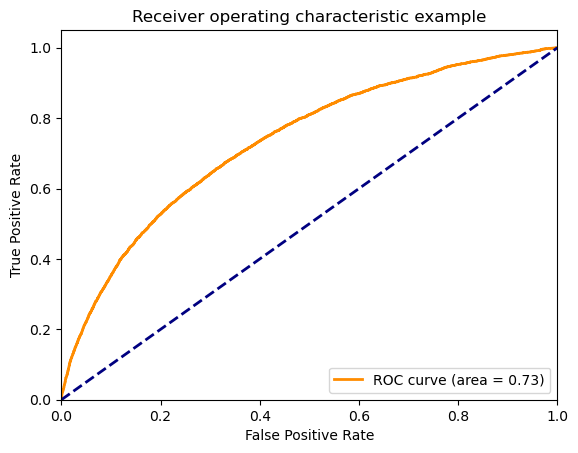

In [36]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [39]:
print(f" Полнота при предсказании 1: {recall_score(y_test, [1]*len(y_test))} \n \
Точность при предсказании 1: {precision_score(y_test, [1]*len(y_test))} \n \
F-мера при предсказании 1: {f1_score(y_test, [1]*len(y_test))}")

 Полнота при предсказании 1: 1.0 
 Точность при предсказании 1: 0.0787 
 F-мера при предсказании 1: 0.1459163808287754


In [40]:
print(f" Полнота при предсказании 0: {recall_score(y_test, [0]*len(y_test))} \n \
Точность при предсказании 0: {precision_score(y_test, [0]*len(y_test))} \n \
F-мера при предсказании 0: {f1_score(y_test, [0]*len(y_test))}")

 Полнота при предсказании 0: 0.0 
 Точность при предсказании 0: 0.0 
 F-мера при предсказании 0: 0.0


/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
predictions = proba[:, 1].copy()
predictions[np.where(predictions > 0.1)] = 1
predictions[np.where(predictions <= 0.1)] = 0

In [42]:
print(f" Полнота при предсказании с порогом 0.1: {recall_score(y_test, predictions)} \n \
Точность при предсказании с порогом 0.1: {precision_score(y_test, predictions)} \n \
F-мера при предсказании с порогом 0.1: {f1_score(y_test, predictions)}")

 Полнота при предсказании с порогом 0.1: 0.570309191020754 
 Точность при предсказании с порогом 0.1: 0.17215367896183598 
 F-мера при предсказании с порогом 0.1: 0.264473361158851
